In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [2]:
# load model
model = tf.keras.models.load_model('./alexnet-cifar10_origin.h5')

# load datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# assert datasets
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)        

In [6]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [8]:
history = model.fit(x_train[:45000], y_train[:45000], batch_size=64, epochs=40, validation_data=(x_train[45000:], y_train[45000:]))

Epoch 1/40
 18/704 [..............................] - ETA: 9:47 - loss: 1.8406 - accuracy: 0.5703

KeyboardInterrupt: 

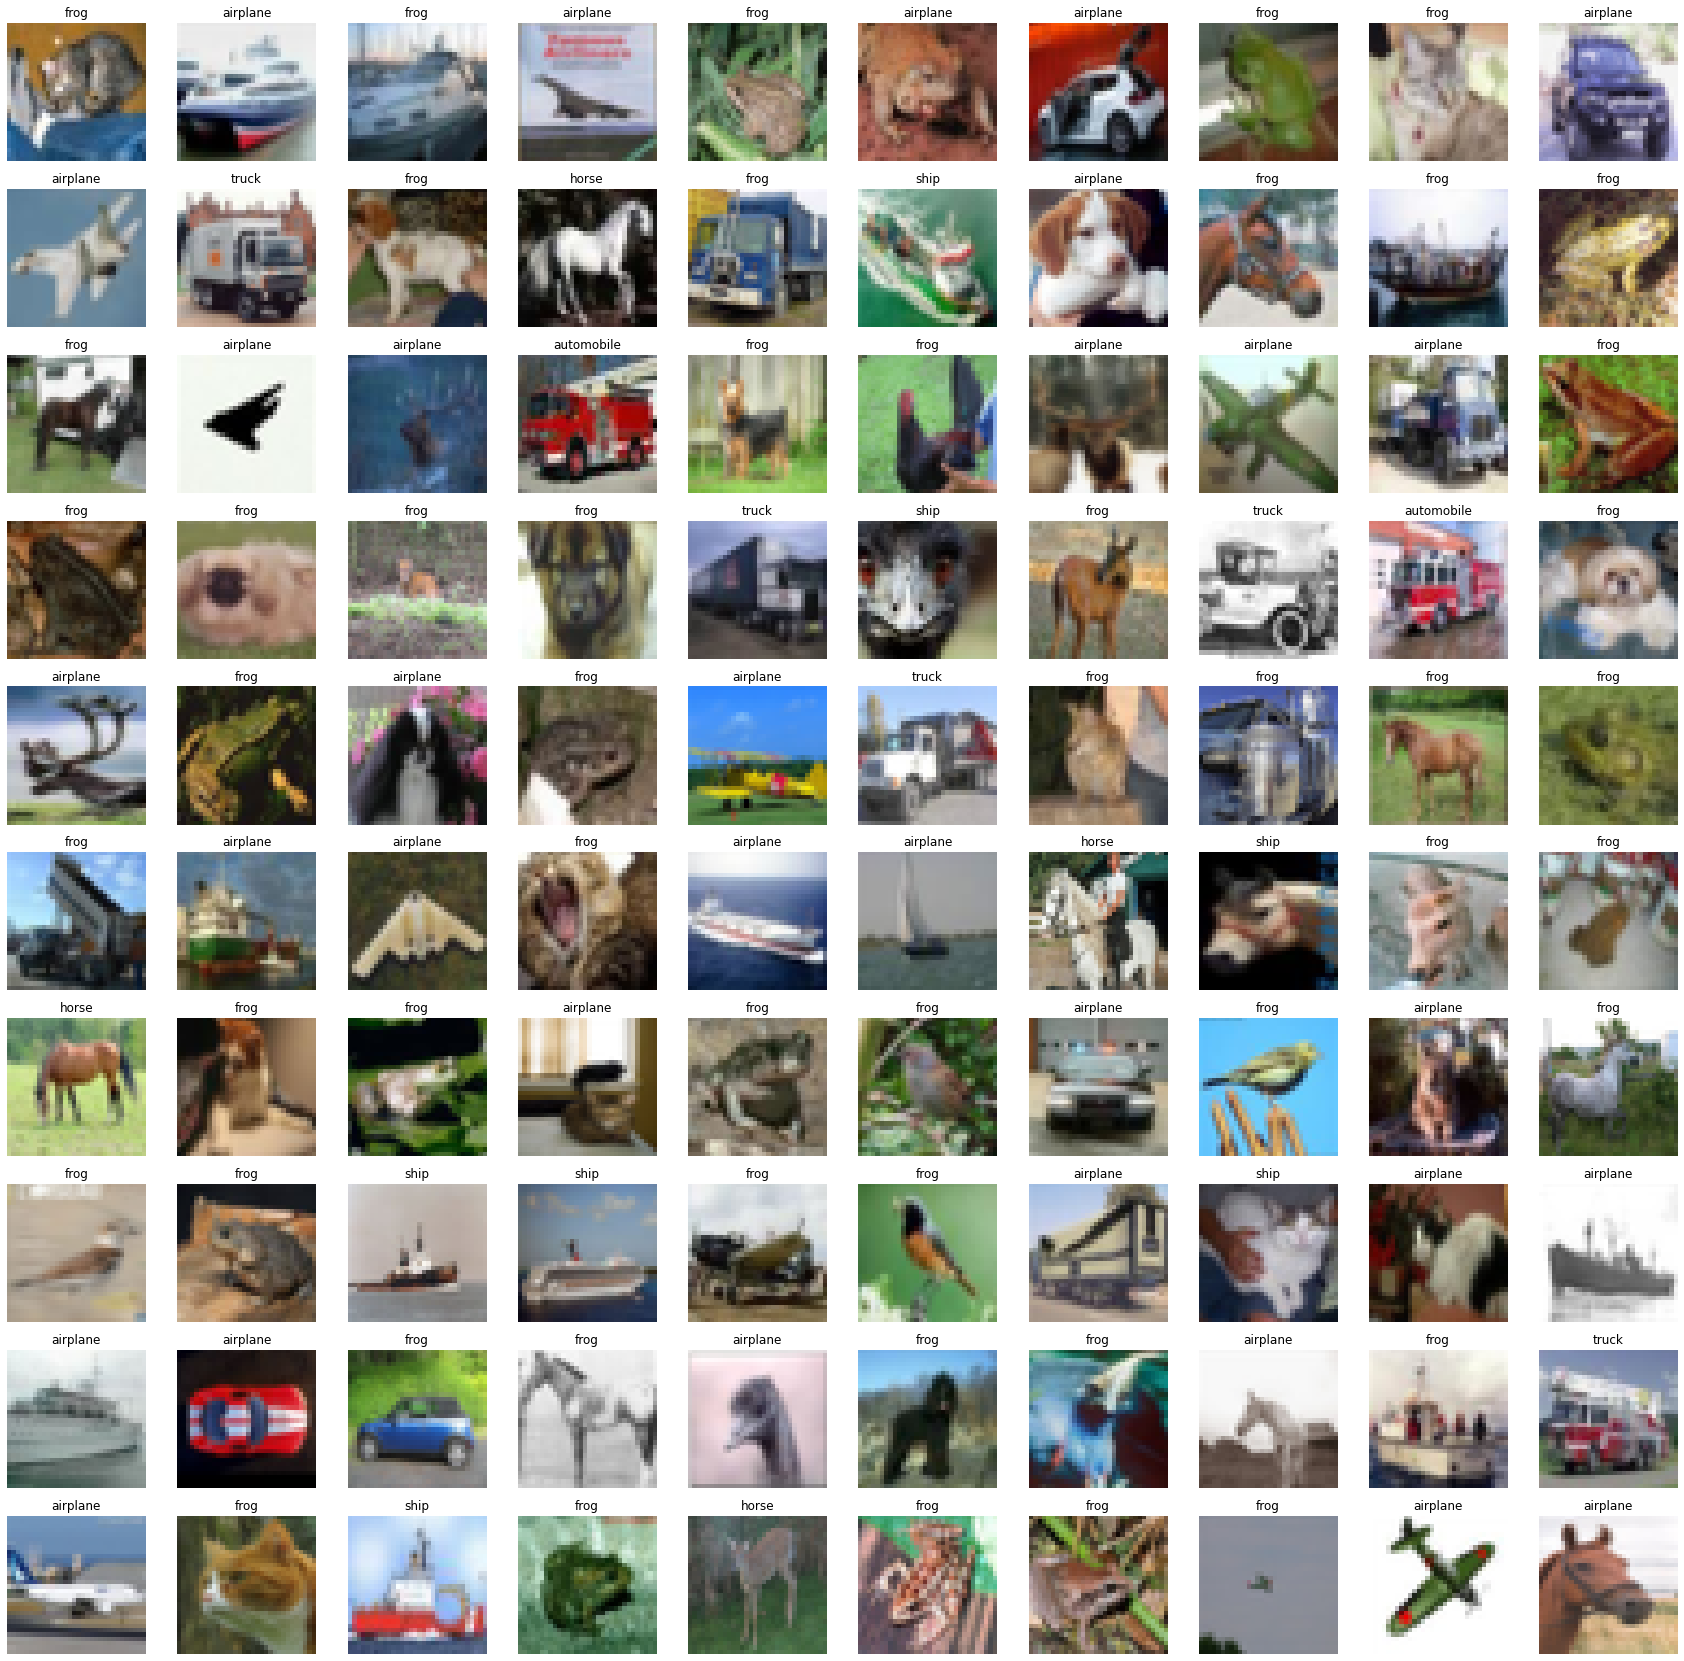

In [7]:
predictions = model.predict(x_test)

labels = ["airplane", "automobile", "bird", "cat", "deer", 'dog', "frog", "horse", "ship", "truck"]

plt.figure(figsize=(30, 30))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(labels[np.argmax(predictions[i])])
    # plt.title(labels[int(y_test[i])])
    plt.axis("off")

'2.2.0'